In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
img = cv2.imread('DATA/dog_backpack.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imread('DATA/watermark_no_copy.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

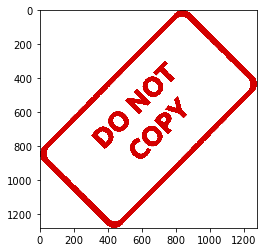

In [11]:
plt.imshow(img1)


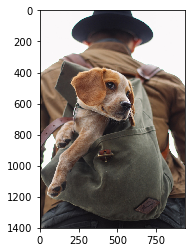

In [10]:
plt.imshow(img)

In [12]:
# BLENDING IMAGES OF THE SAME SIZE

In [18]:
img = cv2.resize(img,(1200,1200))
img1 = cv2.resize(img1,(1200,1200))

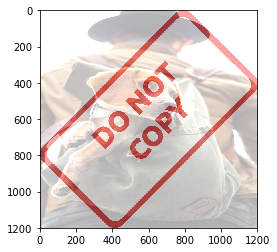

In [21]:
blended = cv2.addWeighted(img, 0.5,img1, 0.5, gamma=0)
plt.imshow(blended)

In [22]:
#OVERLAY SMALL IMAGE ONTOP OF LARGER IMAGE (NO BLENDING)
#NUMPY REASSINGMENT  OPERATION

In [23]:
#BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [24]:
img = cv2.imread('DATA/dog_backpack.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imread('DATA/watermark_no_copy.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [25]:
img1 = cv2.resize(img1, (600,600))

In [26]:
large_img = img
small_img = img1

In [27]:
x_offset = 0
y_offset = 0

In [28]:
x_end = x_offset + small_img.shape[1]#length of small image
y_end = y_offset + small_img.shape[0]

In [29]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

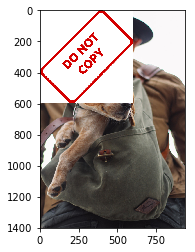

In [30]:
plt.imshow(large_img)

In [1]:
#BLEND TOGETHER IMAGED OS DIFFERENT SIZES

In [4]:
img = cv2.imread('DATA/dog_backpack.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.imread('DATA/watermark_no_copy.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [5]:
img1 = cv2.resize(img1,(600,600))

In [7]:
img.shape

(1401, 934, 3)

In [8]:

x_offset = 934 - 600
y_offset = 1401 - 600

## Optical Flow

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corner_track_params = dict(maxCorners = 10, qualityLevel = 0.3, minDistance = 7, blockSize = 7)

In [3]:
lk_params = dict(winSize = (200,200), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)) #criteria is the number of iterations and accuracy

In [6]:
cap =  cv2.VideoCapture(0)

ret , prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

#PTS TO TRACK
prevPts = cv2.goodFeaturesToTrack(prev_gray, mask = None, **corner_track_params) #** is used to pass the dictionary as arguments

mask = np.zeros_like(prev_frame)

while True:
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    nextPts, status, err = cv2.calcOpticalFlowPyrLK(prev_gray, frame_gray, prevPts, None, **lk_params) #PyrLK is the pyramidal lucas kanade method
    good_new = nextPts[status == 1]
    good_prev = prevPts[status == 1]
    for i, (new, prev) in enumerate(zip(good_new, good_prev)):
        x_new, y_new = new.ravel()
        x_prev, y_prev = prev.ravel() #ravel is used to convert the array into a 1D array
        mask = cv2.line(mask, (x_new, y_new), (x_prev, y_prev), (0,255,0), 3)
        frame = cv2.circle(frame, (x_new, y_new), 8, (0,0,255), -1)
    img = cv2.add(frame, mask)
    cv2.imshow('frame', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    prev_gray = frame_gray.copy()
    prevPts = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()
cap.release()

## Dense Optical Flow

In [8]:
cap = cv2.VideoCapture(0)

ret , prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

hsv_mask = np.zeros_like(prev_frame)
hsv_mask[:,:,1] = 255

while True:
    ret, frame = cap.read()

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1], angleInDegrees=True)
    hsv_mask[:,:,0] = ang/2
    hsv_mask[:,:,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
    cv2.imshow('frame', bgr)
    k = cv2.waitKey(10) & 0xff
    if k == 27:
        break
    prev_gray = frame_gray.copy()

cv2.destroyAllWindows()
cap.release()